In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df_red = pd.DataFrame({'width':[0.3, 0.9, 0.2, 0.4, 0.6],
                        'length':[0.7, 0.2, 0.5, 0.2, 0.3],
                        'color':['red'] * 5})
df_purple = pd.DataFrame({'width':[1.0, 0.8, 1.2, 0.6, 1.3],
                        'length':[0.9, 0.6, 0.5, 0.8, 0.7],
                        'color':['purple'] * 5})
df = pd.concat((df_red, df_purple))

In [25]:
df['width'] = df['width'] * 1000
df['width'] = df['width'] - df['width'].mean()
df['length'] = df['length'] * 10
# df['length'] = df['length'] - df['length'].mean()


In [26]:
df

,color,length,width
0,red,7.0,-430.0
1,red,2.0,170.0
2,red,5.0,-530.0
3,red,2.0,-330.0
4,red,3.0,-130.0
0,purple,9.0,270.0
1,purple,6.0,70.0
2,purple,5.0,470.0
3,purple,8.0,-130.0
4,purple,7.0,570.0


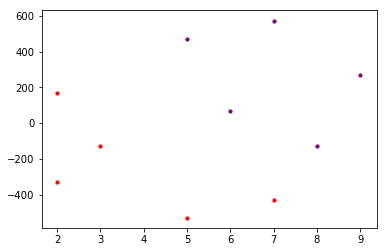

In [27]:
plt.scatter(df[df['color'] == 'red']['length'],
            df[df['color'] == 'red']['width'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['length'],
            df[df['color'] == 'purple']['width'],
            color='purple', s=10)
plt.show()

In [28]:
def normalization(target, val_min, val_max):
    return (target - val_min) / (val_max - val_min)

color = df['color'].unique()
y =  np.array(list(map(lambda x: 0 if x == 'red' else 1,
                        df.values[:, 0])))   
x = df.values[:, 1:].astype(np.float32)
x_minmax0 = np.array([x[:, 0].min(), x[:, 0].max()])
x_minmax1 = np.array([x[:, 1].min(), x[:, 1].max()])
x[:, 0] = normalization(x[:, 0], *x_minmax0)
x[:, 1] = normalization(x[:, 1], *x_minmax1)
bias = np.ones((df.shape[0], 1))
x = np.concatenate((x, bias), 1)

In [29]:
def softmax(predict):
    softmax = np.power(np.e, predict) / np.sum(np.power(np.e, predict))
    return softmax

def sigmoid(predict):
    sigmoid = 1 / (1 + np.exp(-predict))
    return sigmoid

def loss_log(y, predict):
    loss_log = -np.mean(y * np.log(predict) +
                        (1 - y) * np.log(1 - predict))
    return loss_log

In [30]:
weight = np.random.random(x.shape[1])

delta = np.zeros(weight.size, np.float32)
alpha = np.array([0.01] * weight.size, np.float32)

epochs = 200
error = np.zeros(epochs, np.float64)
for j in range(epochs):
    predict = sigmoid(x @ weight)
    error[j] = loss_log(y, predict)
    for i in range(x.shape[0]):
        predict = sigmoid(x[i] @ weight)
        # delta += (predict - y[i]) * x[i]
        delta += (predict - y[i]) * predict * (1 - predict) * x[i]
    weight -= delta * alpha

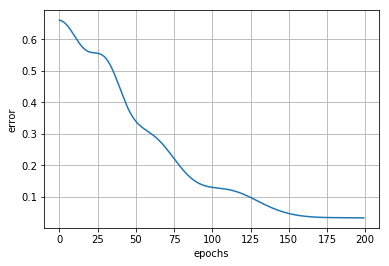

In [31]:

plt.plot(range(epochs), error)
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid()
plt.show()

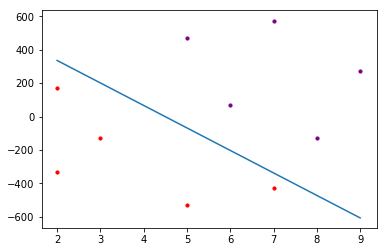

In [32]:
plt.scatter(df[df['color'] == 'red']['length'],
            df[df['color'] == 'red']['width'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['length'],
            df[df['color'] == 'purple']['width'],
            color='purple', s=10)

divider_x0 = np.array([df['length'].min(), df['length'].max()])
divider_x0 = normalization(divider_x0, *x_minmax0)
divider_x1 = -(divider_x0 * weight[0] + weight[2]) / weight[1]
divider_x1 = divider_x1 * (x_minmax1[1] - x_minmax1[0]) + x_minmax1[0]


divider_x0 = np.array([df['length'].min(), df['length'].max()])
plt.plot(divider_x0, divider_x1)
plt.show()